In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import sys, os
sys.path.append(os.path.abspath('..'))
from pre_processamento.processamento_dados import processamento

In [2]:
df = processamento()
# --- Criar conjuntos de treino / validação / teste (por períodos) ---
# Período de treino (2010)
train_end = '2010-12-31 23:00:00'
df_train = df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].loc[:train_end]
# Período de validação (2011)
val_end = '2011-12-31 23:00:00'
val_start = '2011-01-01 00:00:00'
df_val = df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].loc[val_start:val_end]

# Período de teste (2012)
test_start = '2012-01-01 00:00:00'
df_test = df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'].loc[test_start:]

In [3]:
from statsmodels.tsa.stattools import adfuller

In [8]:
#adfuller
result=adfuller(df_train)
labels = ['Teste estatístico ADF','p-value','#Lags usados','Números de observações usadas']
for value,label in zip(result,labels):
    print(label+' : '+str(value) )
if result[1] <= 0.05:
    print("Forte evidência contra a hipótese nula(Ho), rejeita a hipótese nula. A série possui estacionariedade")
else:
    print("Evidência fraca contra a hipótese nula, indicios de que a série não é estacionária")

Teste estatístico ADF : -6.109283433872389
p-value : 9.418028684616525e-08
#Lags usados : 25
Números de observações usadas : 8734
Forte evidência contra a hipótese nula(Ho), rejeita a hipótese nula. A série possui estacionariedade


In [9]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

<Figure size 1200x500 with 0 Axes>

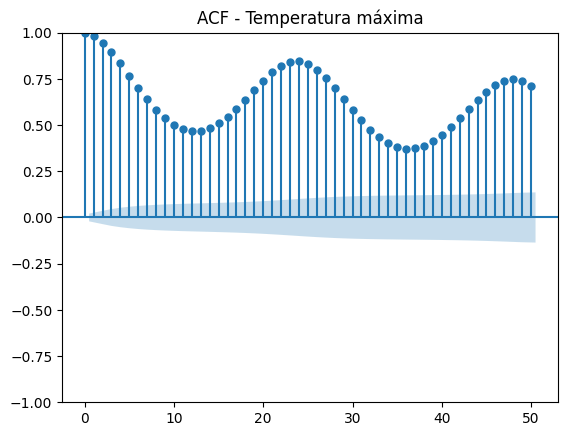

<Figure size 1200x500 with 0 Axes>

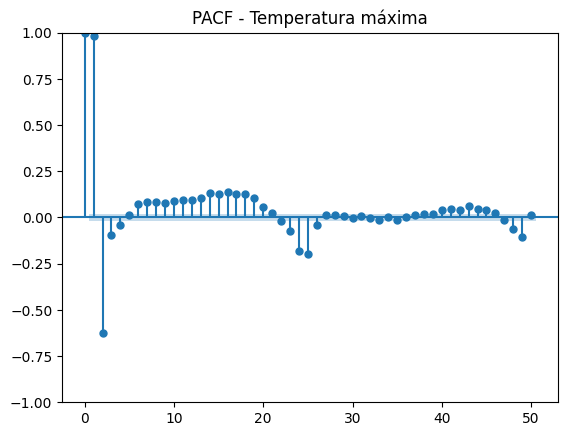

In [10]:
plt.figure(figsize=(12, 5))
plot_acf(df_train, lags=50)
plt.title(f"ACF - Temperatura máxima")
plt.show()

plt.figure(figsize=(12, 5))
plot_pacf(df_train, lags=50, method="ywm")
plt.title(f"PACF - Temperatura máxima")
plt.show()

Ao ver os resultados, temos uma incoerência entre o teste de hipótese e o gráfico ACF. Tal problema pode ocorrer devido a uma alta sazonalidade na série, o que é esperado de uma série temporal relacionada a clima.

Para resolver tal problema temos que retirar a sazonalidade da série por meio de uma diferenciação, nesse caso como as observações são por hora do dia, iremos tentar uma diferenciação de 24 observações

<Figure size 1200x500 with 0 Axes>

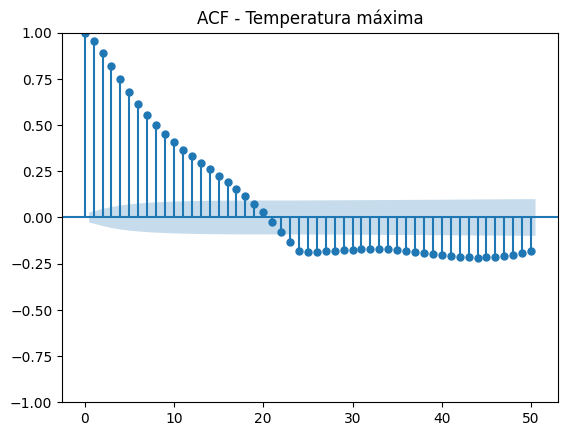

In [ ]:
df_treino_diff = df_treino.diff(24)
df_treino_diff.dropna(inplace=True)
plt.figure(figsize=(12, 5))
plot_acf(df_treino_diff, lags=50)
plt.title(f"ACF - Temperatura máxima")
plt.show()

Ao fazer isso há uma diferença significativa no plot da ACF e podemos dizer que agora a série está estacionária, já que dentro de 30 lags a ACF reduziu e ficou próxima de 0.

Mas se quisermos podemos testar outros valores diferenciação para ver se conseguimos uma série mais próxima de uma ACF normal que cai por volta do lag 5

<Figure size 1200x500 with 0 Axes>

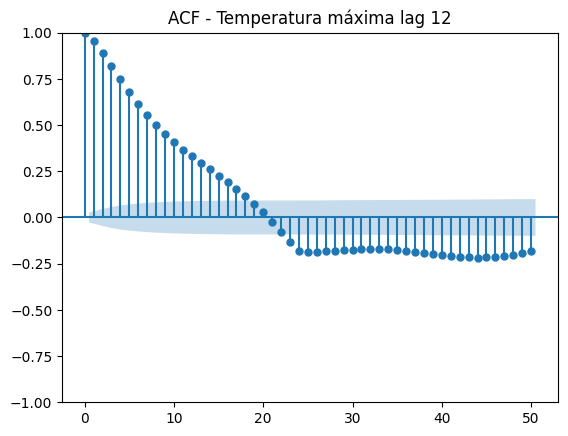

<Figure size 1200x500 with 0 Axes>

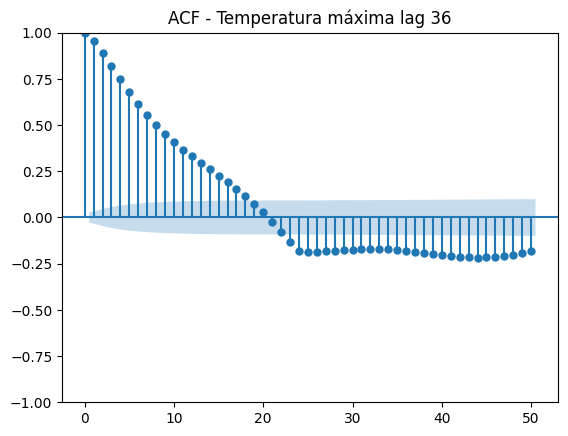

<Figure size 1200x500 with 0 Axes>

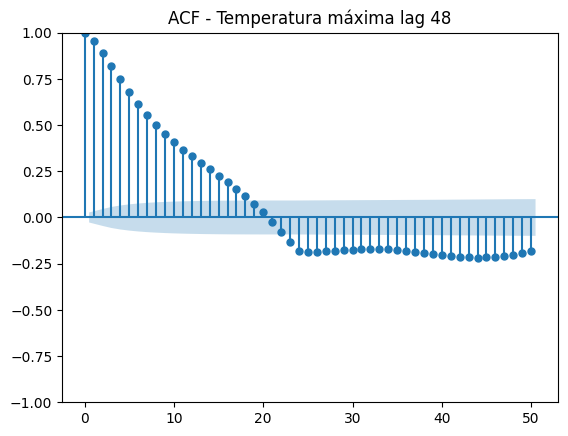

<Figure size 1200x500 with 0 Axes>

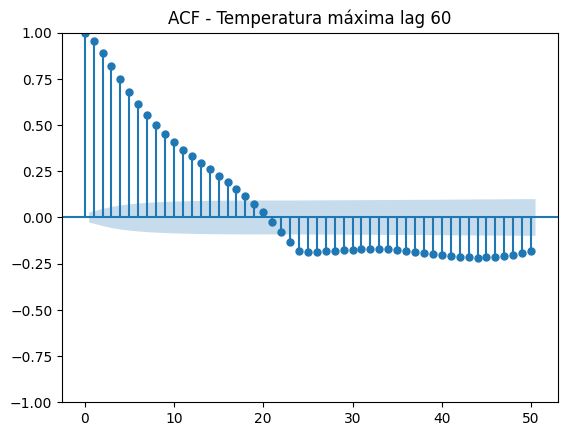

<Figure size 1200x500 with 0 Axes>

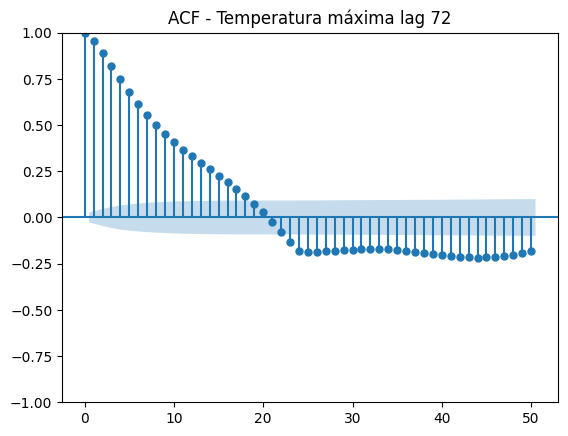

<Figure size 1200x500 with 0 Axes>

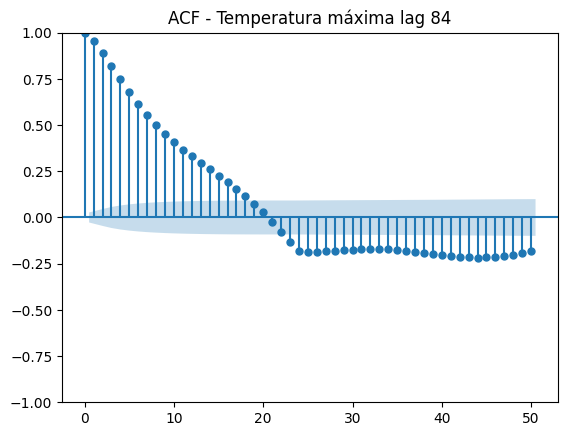

<Figure size 1200x500 with 0 Axes>

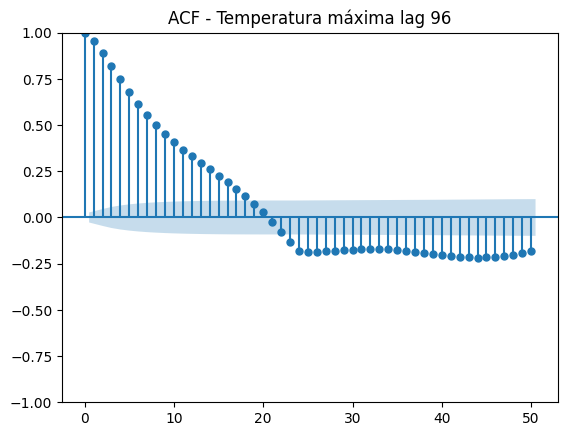

<Figure size 1200x500 with 0 Axes>

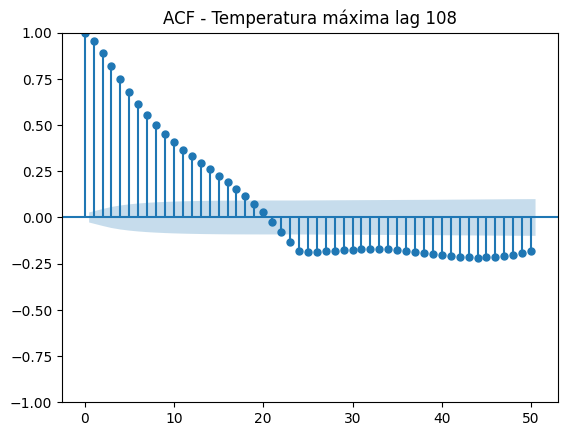

<Figure size 1200x500 with 0 Axes>

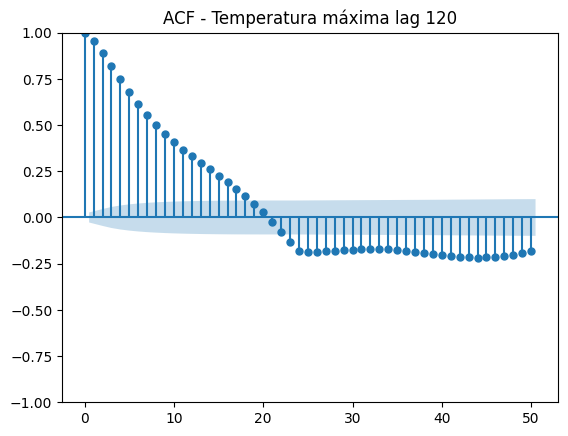

<Figure size 1200x500 with 0 Axes>

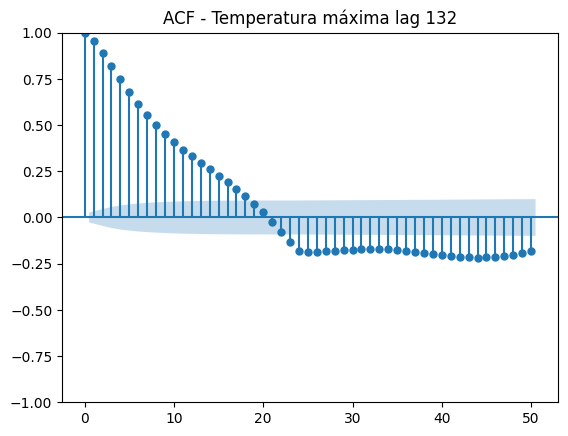

<Figure size 1200x500 with 0 Axes>

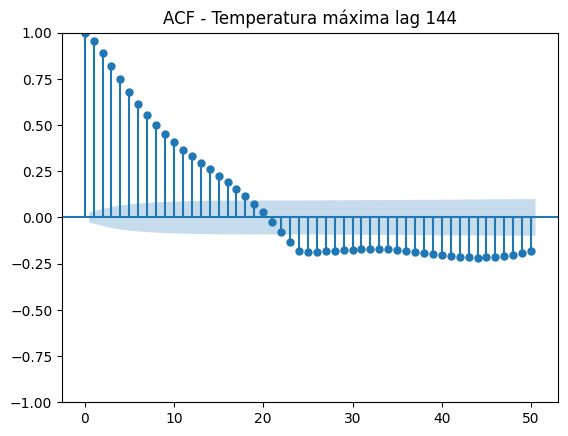

<Figure size 1200x500 with 0 Axes>

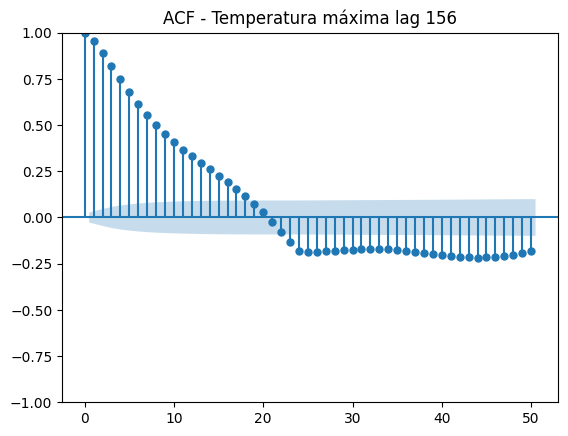

<Figure size 1200x500 with 0 Axes>

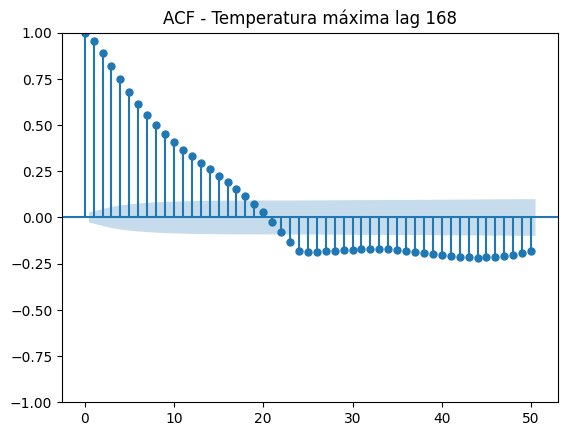

In [ ]:
lag = [12, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168]
for i in lag:
  temp = df_treino.diff(i)
  temp.dropna(inplace=True)
  plt.figure(figsize=(12, 5))
  plot_acf(df_treino_diff, lags=50)
  plt.title(f"ACF - Temperatura máxima lag {i}")
  plt.show()

Após o teste é possível notar que não houveram diferenças confirmando que podemos assumir 24 como a sazonalidade dessa série